## Лобанов Дмитрий Сергеевич, ИУ5-25М

## Рубежный контроль №1: "Методы обработки данных"

### Номер варианта: 5

### Номер задачи №1: 5

### Номер задачи №2: 25

**Задача №5.**
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "one-hot encoding".

**Задача №25.**
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе межквартильного размаха.

**Дополнительные требования по группам:**

Для студентов группы **ИУ5-25М**, ИУ5И-25М, ИУ5-25МВ - для произвольной колонки данных построить парные диаграммы (pairplot).

Описание набора данных heart-disease-dataset - https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


Этот набор данных датируется 1988 годом и состоит из четырёх баз данных: Кливленд, Венгрия, Швейцария и Лонг-Бич V. Он содержит 76 признаков, включая целевой (предсказываемый) признак, однако во всех опубликованных экспериментах используется подмножество из 14 признаков.

Поле "target" обозначает наличие сердечного заболевания у пациента. Принимает целочисленные значения:
0 — заболевание отсутствует,
1 — заболевание присутствует.

Используемые признаки:

* age — возраст

* sex — пол

* chest pain type (4 values) — тип болей в груди (4 варианта)

* resting blood pressure — артериальное давление в состоянии покоя

* serum cholestoral in mg/dl — уровень холестерина в сыворотке крови (мг/дл)

* fasting blood sugar > 120 mg/dl — уровень сахара натощак > 120 мг/дл

* resting electrocardiographic results (values 0,1,2) — результаты ЭКГ в покое (значения: 0, 1, 2)

* maximum heart rate achieved — максимальная достигнутая частота сердечных сокращений

* exercise induced angina — стенокардия, вызванная физической нагрузкой

* oldpeak — степень депрессии сегмента ST, вызванная нагрузкой по сравнению с состоянием покоя

* the slope of the peak exercise ST segment — наклон сегмента ST на пике физической нагрузки

* number of major vessels (0–3) colored by fluoroscopy — количество основных сосудов (0–3), окрашенных при флюороскопии

* thal — состояние таллия: 0 = норма; 1 = фиксированный дефект; 2 = обратимый дефект

Имена и номера социального страхования пациентов были недавно удалены из базы данных и заменены фиктивными значениями.

### **Задача №5.**

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [29]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "heart.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "johnsmith88/heart-disease-dataset",
  file_path,
)
df.shape

<ipython-input-29-2a360fe0e2f5>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


(1025, 14)

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [32]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [33]:
# Проверим уникальные значения признака chest pain type (cp)
print("Уникальные значения признака 'cp':", df['cp'].unique())

Уникальные значения признака 'cp': [0 1 2 3]


In [34]:
# Применим one-hot encoding
df_encoded = pd.get_dummies(df, columns=['cp'], prefix='cp')

# Посмотрим на результат
print("\nДатасет после one-hot encoding:")
display(df_encoded.head())


Датасет после one-hot encoding:


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3
0,52,1,125,212,0,1,168,0,1.0,2,2,3,0,True,False,False,False
1,53,1,140,203,1,0,155,1,3.1,0,0,3,0,True,False,False,False
2,70,1,145,174,0,1,125,1,2.6,0,0,3,0,True,False,False,False
3,61,1,148,203,0,1,161,0,0.0,2,1,3,0,True,False,False,False
4,62,0,138,294,1,1,106,0,1.9,1,3,2,0,True,False,False,False


### **Задача №25.**

Обработаем выбросы в 'chol'

In [35]:
# Выберем числовой признак, например 'chol' (уровень холестерина)
feature = 'chol'

# Расчёт межквартильного размаха
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

64.0


In [36]:
# Границы для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Границы для выбросов по признаку '{feature}':")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

Границы для выбросов по признаку 'chol':
Нижняя граница: 115.0
Верхняя граница: 371.0


In [37]:
# Найдём выбросы
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
print(f"\nКоличество выбросов: {len(outliers)}")


Количество выбросов: 16


In [38]:
# Удалим выбросы
df_cleaned = df[~((df[feature] < lower_bound) | (df[feature] > upper_bound))]

print(f"\nРазмер исходного датасета: {len(df)}")
print(f"Размер очищенного датасета: {len(df_cleaned)}")


Размер исходного датасета: 1025
Размер очищенного датасета: 1009


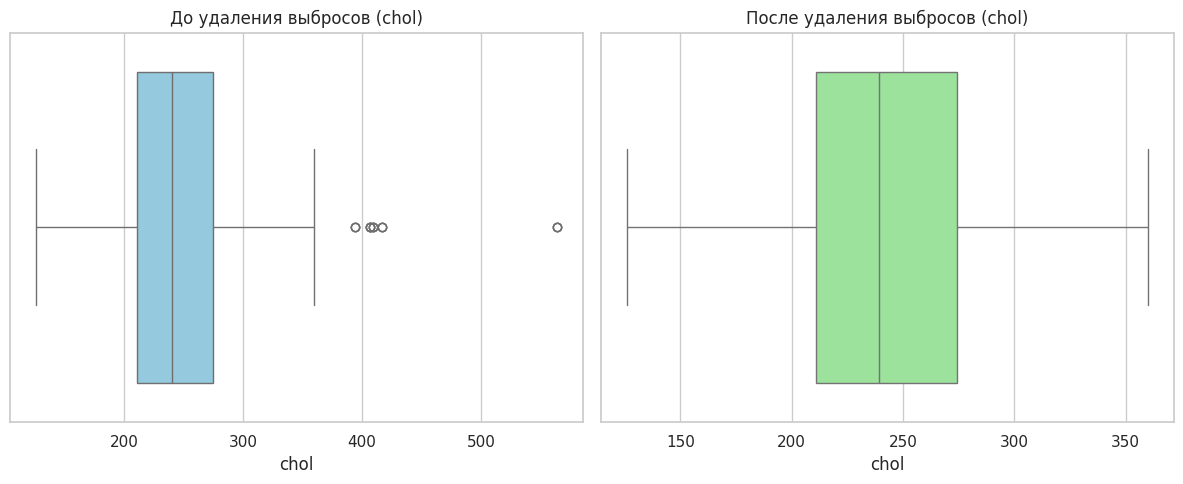

In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df[feature], color='skyblue')
plt.title(f"До удаления выбросов ({feature})")

# Построим boxplot после удаления выбросов
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned[feature], color='lightgreen')
plt.title(f"После удаления выбросов ({feature})")

plt.tight_layout()
plt.show()

### **Дополнительные требования по группам:**

Для столбца 'age' построим парные диаграммы с другими численными столбцами

In [40]:
numerical_cols = [
    c for c in df.columns
    if df[c].dtype in ['float64', 'int64']
]
numerical_cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

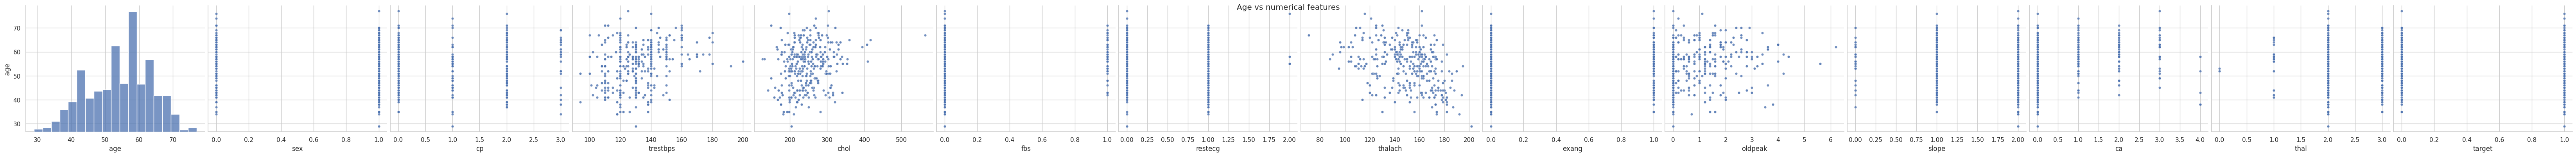

In [41]:
sns.pairplot(
    data=df,
    x_vars=numerical_cols,
    y_vars=['age'],
    plot_kws={'alpha': 0.4, 's': 20},
    height=4,
    aspect=1.2
)
plt.suptitle('Age vs numerical features')
plt.show()